## HW03 Code


You will complete the following notebook, as described in the PDF for Homework 03 (included in the download with the starter code).  You will submit:
1. This notebook file, along with your COLLABORATORS.txt file, to the Gradescope link for code.
2. A PDF of this notebook and all of its output, once it is completed, to the Gradescope link for the PDF.


Please report any questions to the [class Piazza page](piazza.com/tufts/summer2021/cs135).

### Import required libraries.

In [145]:
import os
import numpy as np
import pandas as pd

import warnings

import sklearn.linear_model
import sklearn.metrics
import sklearn.calibration

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn') # pretty matplotlib plots

### Function for later use
This function will compute and return a confusion matrix on data, given probabilistic predictions, and a threshold to use when converting probabilities to "firm" predictions.

***Don't change this function.***

In [146]:
def calc_confusion_matrix_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute the confusion matrix for a given probabilistic classifier and threshold
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    cm_df : Pandas DataFrame
        Can be printed like print(cm_df) to easily display results
    '''
    cm = sklearn.metrics.confusion_matrix(ytrue_N, yproba1_N >= thresh)
    cm_df = pd.DataFrame(data=cm, columns=[0, 1], index=[0, 1])
    cm_df.columns.name = 'Predicted'
    cm_df.index.name = 'True'
    return cm_df


## Cancer-Risk Screening

### 1: Compute true/false positives/negatives.

Complete the following code.

In [147]:
def calc_TP_TN_FP_FN(ytrue_N, yhat_N):
    '''
    
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yhat_N : 1D array of floats
        Each entry represents a predicted binary value (either 0 or 1).
        One entry per example in current dataset.
        Needs to be same size as ytrue_N.

    Returns
    -------
    TP : int
        Number of true positives
    TN : int
        Number of true negatives
    FP : int
        Number of false positives
    FN : int
        Number of false negatives
    '''
    
    TP = 0.0
    TN = 0.0
    FP = 0.0
    FN = 0.0
    for idx in range(len(ytrue_N)):
        if (ytrue_N[idx] == 1 and yhat_N[idx] == 1):
            TP += 1
        elif (ytrue_N[idx] == 0 and yhat_N[idx] == 0):
            TN += 1
        elif (ytrue_N[idx] == 1 and yhat_N[idx] == 0):
            FN += 1
        elif (ytrue_N[idx] == 0 and yhat_N[idx] == 1):
            FP += 1
    return TP, TN, FP, FN



#### Testing code
The following four calls to the function above test your results.  ***Don't modify this.***

In [148]:
all0 = np.zeros(10)
all1 = np.ones(10)
calc_TP_TN_FP_FN(all0, all1)

(0.0, 0.0, 10.0, 0.0)

In [149]:
calc_TP_TN_FP_FN(all1, all0)

(0.0, 0.0, 0.0, 10.0)

In [150]:
calc_TP_TN_FP_FN(all1, all1)

(10.0, 0.0, 0.0, 0.0)

In [151]:
calc_TP_TN_FP_FN(all0, all0)

(0.0, 10.0, 0.0, 0.0)

### Load the dataset.

The following should ***not*** be modified.  After it runs, the various arrays it creates will contain the 2- or 3-feature input datasets.

In [152]:
# Load the x-data and y-class arrays
x_train = np.loadtxt('./data_cancer/x_train.csv', delimiter=',', skiprows=1)
x_test = np.loadtxt('./data_cancer/x_test.csv', delimiter=',', skiprows=1)

y_train = np.loadtxt('./data_cancer/y_train.csv', delimiter=',', skiprows=1)
y_test = np.loadtxt('./data_cancer/y_test.csv', delimiter=',', skiprows=1)

### 2: Compute the fraction of patients with cancer.

Complete the following code.  Your solution needs to ***compute*** these values from the training and testing sets (i.e., don't simply hand-count and print the values).

In [153]:
acc_train = (y_train == 1).sum()  / y_train.size
acc_test = (y_test == 1).sum()  / y_test.size
print("Fraction of data that has_cancer on TRAIN: %.3f" % acc_train) #TODO: modify these prints
print("fraction of data that has_cancer on TEST : %.3f" % acc_test)

Fraction of data that has_cancer on TRAIN: 0.140
fraction of data that has_cancer on TEST : 0.139


### 3: The predict-0-always baseline

#### (a) Compute the accuracy of the always-0 classifier.

Complete the code to compute and print the accuracy of the always-0 classifier on validation and test outputs.

In [154]:
acc_always0_train = (y_train == 0).sum() /y_train.size
acc_always0_test = (y_test == 0).sum() /y_test.size

print("acc on TRAIN: %.3f" % acc_always0_train) #TODO: modify these values
print("acc on TEST : %.3f" % acc_always0_test)

acc on TRAIN: 0.860
acc on TEST : 0.861


#### (b) Print a confusion matrix for the always-0 classifier.

Add code below to generate a confusion matrix for the always-0 classifier on the test set.

In [155]:
# TODO: call print(calc_confusion_matrix_for_threshold(...))
test_set_size = y_test.size
always0_clssifer = [0.0 for i in range(test_set_size)]
always0_clssifer_nparray = np.array(always0_clssifer)
calc_confusion_matrix_for_threshold(y_test, always0_clssifer_nparray)



Predicted,0,1
True,,
0,155,0
1,25,0


#### (c) Reflect on the accuracy of the always-0 classifier.

**Answer**: 
>As you could see, the accurary rate is pretty high, which is around $ 0.86\% $ (i.e. $\frac{155}{155+25}$).
>
>Probably the only pro about this always-0 classifer is simple and superfacial "high accuracy rate". 
>
>However, it has a lot of cons. It doesn't make any sense since it basically doesn't do any actual prediction. And sometimes we're more caring about the false positive and false negative. e.g. In medical situation, we don't want to miss any positve cases. Even though the false positive would increase as the result of reducing false negative, we can take some actions (e.g. second examination) to offset that.  
>
>In this task, because we're caring about picking out those who have a high change to get cancer, we do want get a lower false negative rate. But this always-0 classifer doesn't meet this requirement, so we won't just use it.


#### (d) Analyze the various costs of using the always-0 classifier.


**Answer**: 
> One type of error about this always-0 classifer is that it could potentially not pick out those with a higher probability to get cancer. The result is very serious. Imagine a doctor tells a patient that he is good but actually not, and this would probably cause the patient to miss the best timing for the treatment, which will cost a lot of money and even "killing" a life later on.
>
>Thus, I would not recommend using this classifier.

### 4: Basic Perceptron Models

#### (a) Create a basic `Perceptron` classifier

Fit a perceptron to the training data.  Print out accuracy on this data, as well as on testing data.  Print out a confusion matrix on the testing data.

In [156]:
from sklearn.linear_model import Perceptron 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

slr = MinMaxScaler()

new_x_train = slr.fit_transform(x_train)
new_x_test = slr.fit_transform(x_test)
ppn = Perceptron()
# print(ppn.score(new_x_train, y_train))
ppn.fit(new_x_train, y_train)


y_train_pred = ppn.predict(new_x_train)
y_test_pred = ppn.predict(new_x_test)

# print(y_train_pred)
# print(ppn.decision_function(new_x_train))


train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
# print("train_acc: ", train_acc)
# print("test_acc", test_acc)
print("acc on TRAIN: %.3f" % train_acc) #TODO: modify these values
print("acc on TEST : %.3f" % test_acc)
# TODO: call print(calc_confusion_matrix_for_threshold(...))
print("")
print(calc_confusion_matrix_for_threshold(y_test, y_test_pred))

acc on TRAIN: 0.402
acc on TEST : 0.567

Predicted   0   1
True             
0          77  78
1           0  25


#### (b) Compare the `Perceptron` to the always-0 classifier.

**Answer**: 
> Although it seems that perceptron performs worse than always-0 classifier at the first glance if we only focus on pure accuracy rate.
>
>However, it actually did a better job. 
>
>First, Perceptron actually did some prediction work rather than always giving a same feedback everytime no matter what the input is (i.e. like always-0 classifier)
>
>Second, since in this context (i.e. about picking out cancer among people), we're more caring about false negative (i.e. we prefer a low value cuz we don't want to miss out someone who has a high change to have cancer). And perceptron has a 0 flase negative rate, which is pretty good compared to always-0 classifier. Even though its false positive rate is higher, we can always offset that by doing a second examination. 


#### (c) Generate a series of regularized perceptron models
Each model will use a different `alpha` value, multiplying that by the L2 penalty.  You will record and plot the accuracy of each model on both training and test data.

In [157]:
train_accuracy_list = list()
test_accuracy_list = list()

# TODO: create, fit models here and record accuracy of each
alphas = np.logspace(-5, 5, base=10, num=100)
for cur_alpha in alphas:
    ppn = Perceptron(penalty='l2', alpha=cur_alpha)
    ppn.fit(new_x_train, y_train)
    train_accuracy_list.append(ppn.score(new_x_train, y_train))
    test_accuracy_list.append(ppn.score(new_x_test, y_test))



##### Plot accuracy on train/test data across the different alpha values.

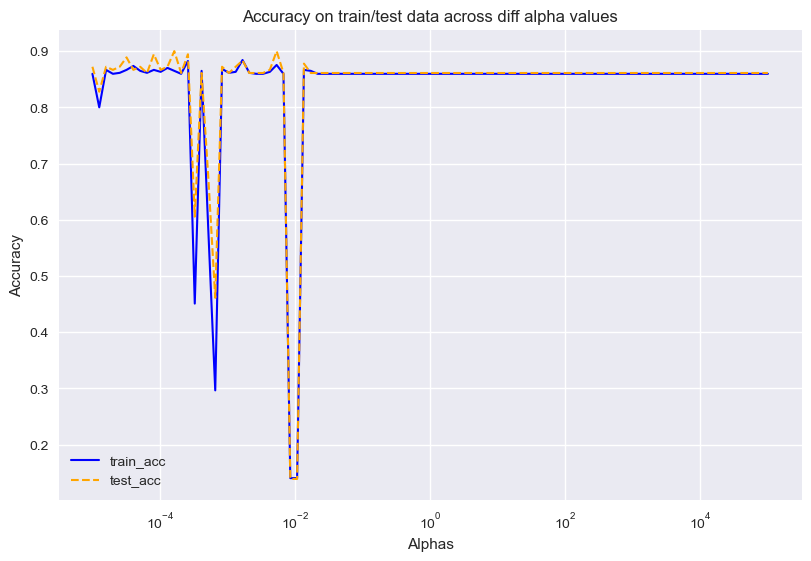

In [158]:
# # TODO make plot
# plt.xlabel('log_10(alpha)');
# plt.ylabel('Accuracy');

# TODO add legend, titles, etc.
# plt.legend(...);
fig_q4, ax_q4 = plt.subplots(layout = "constrained")
ax_q4.plot(alphas, train_accuracy_list, linewidth=1.5, color='blue',label='train_acc')
ax_q4.plot(alphas, test_accuracy_list, linewidth=1.5, color='orange', linestyle='--', label='test_acc')
ax_q4.legend()
ax_q4.set_xlabel("Alphas")
ax_q4.set_ylabel("Accuracy")
ax_q4.set_title("Accuracy on train/test data across diff alpha values")
ax_q4.set_xscale('log')


#### (d) Discuss what the plot is showing you.

**Answer**: 
>The plot shows that before alpha equals $10^{-2}$, there's a huge oscillation on accuracy; after alpha equals $10^{-2}$, the accuracy tends to become stable. However, regularization seems to be little use in terms for improving the best accuracy performance.
>
>This is quite different from the regularization we saw in hw2, where the alpha had a global optimal. And also, here we saw that the testing accuracy is better than training accuracy for relatively large domain, which is also different that what we saw in HW2 (i.e. training performance is always better than testing performance in HW2).
>
> The major reason for this difference is the model type, in HW2 we built a regression model while here we're building a classifier. There're also other reasons like loss measure and domain dimension. For loss measure, in HW2 we use mean squared error, while here we use perception loss, and y axis is accuracy instead of Avg MSE in hw2. 
For domain dimension, HW2 the input only has 1 feature, here we have 3 features, and we also resaled them.
>
>And these probably cause the plots having the different manifestations.

### 5: Decision functions and probabilistic predictions

#### (a) Create two new sets of predictions

Fit `Perceptron` and `CalibratedClassifierCV` models to the data.  Use their predictions to generate ROC curves. 

In [159]:
# TODO: fit a Perceptron and generate its decision_function() over the test data.
ppn = Perceptron()
ppn.fit(new_x_train, y_train)
confid_scores_y_test = ppn.decision_function(new_x_test)
# TODO: Build a CalibratedClassifierCV, using a Perceptron as its base_estimator, 
#       and generate its probabilistic predictions over the test data.

from sklearn.calibration import CalibratedClassifierCV

ppn = Perceptron()
cccv = CalibratedClassifierCV(ppn, method='isotonic')
cccv.fit(new_x_train, y_train)

prob_y_test = cccv.predict_proba(new_x_test)


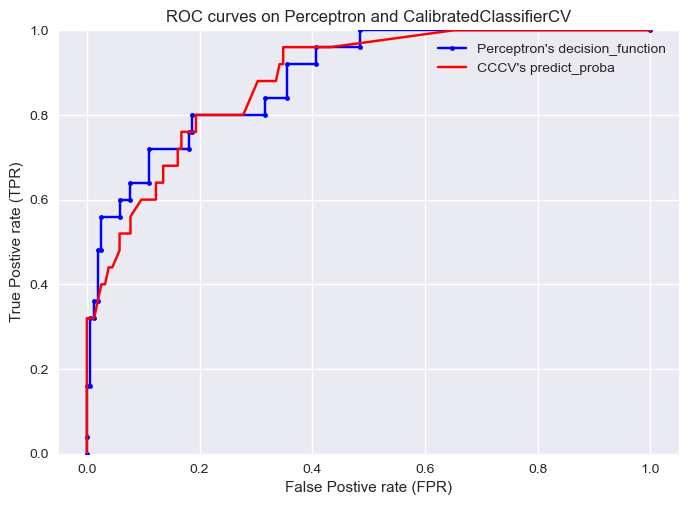

In [160]:
# TODO something like: fpr, tpr, thr = sklearn.metrics.roc_curve(...)
from sklearn.metrics import roc_curve, roc_auc_score


probs_class1_y_test = prob_y_test[:, 1]

auroc_ppn = roc_auc_score(y_test, confid_scores_y_test)
auroc_cccv = roc_auc_score(y_test, probs_class1_y_test)

fpr_ppn, tpr_ppn, thresh_ppn = roc_curve(y_test, confid_scores_y_test)
fpr_cccv, tpr_cccv, thresh_cccv = roc_curve(y_test, probs_class1_y_test)
plt.plot(fpr_ppn, tpr_ppn, marker=".", color="blue", label="Perceptron's decision_function")
plt.plot(fpr_cccv, tpr_cccv, marker="+", color="red",label="CCCV's predict_proba")

plt.ylim([0, 1]);
plt.xlabel("False Postive rate (FPR)");
plt.ylabel("True Postive rate (TPR)");
plt.title("ROC curves on Perceptron and CalibratedClassifierCV")
plt.legend()


In [161]:
print("AUC on TEST for Perceptron: %.3f" % auroc_ppn) #TODO: modify these values
print("AUC on TEST for probabilistic model: %.3f" % auroc_cccv)

AUC on TEST for Perceptron: 0.889
AUC on TEST for probabilistic model: 0.882


#### (b) Discuss the results above

**Answer**: 
>The ROC curves of two models are very similiar in general, which could be shown from both the shape of the graphs and AUC values (i.e. one is 0.889 and the other is 0.882)  
>
>Based on our tolerence with false positive rate, we could choose one over the other.  
>
>Personally, we would choose Perceptron for two reasons. Firstly it has a higher AUC value, which generally means it performs better. Secondly, in this context we're careing about the cancer-risk, which is usually rare among the whole population. That decides we have have high demand on TPR and also relatively high tolerence on FPR (i.e. we want to pick out all positive cases, while we allow to mistakenly classify some negative people as positive). In the curve, you could see that Perceptron (i.e. blue curve) first reaches to TPR 1.0 with FPR around 0.48; while CCCV reaches to TPR 1.0 with FPR around 0.63. This shows Perceptron is more desired cuz it could pick out all positive cases with less false positive cases. 
>
>

#### (c) Compute model metrics for different probabilistic thresholds

Complete the function that takes in a set of correct outputs, a matching set of probabilities generated by a classifier, and a threshold at which to set the positive decision probability, and returns a set of metrics if we use that threshold.

In [162]:
def calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Compute performance metrics for a given probabilistic classifier and threshold
    Args
    ----
    ytrue_N : 1D array of floats
        Each entry represents the binary value (0 or 1) of 'true' label of one example
        One entry per example in current dataset
    yproba1_N : 1D array of floats
        Each entry represents a probability (between 0 and 1) that correct label is positive (1)
        One entry per example in current dataset
        Needs to be same size as ytrue_N
    thresh : float
        Scalar threshold for converting probabilities into hard decisions
        Calls an example "positive" if yproba1 >= thresh
        Default value reflects a majority-classification approach (class is the one that gets
        highest probability)

    Returns
    -------
    acc : accuracy of predictions
    tpr : true positive rate of predictions
    tnr : true negative rate of predictions
    ppv : positive predictive value of predictions
    npv : negative predictive value of predictions
    '''

    # TODO: fix this
    acc = 0
    tpr = 0
    tnr = 0
    ppv = 0
    npv = 0
    
    actual_t_predict_t = 0
    actual_t_predict_f = 0
    actual_f_predict_t = 0
    actual_f_predict_f = 0
    
    for i in range( len(ytrue_N) ):
        if (ytrue_N[i] == 1 and yproba1_N[i] >= thresh):
            actual_t_predict_t += 1
        elif (ytrue_N[i] == 1 and yproba1_N[i] < thresh):
            actual_t_predict_f += 1
        elif (ytrue_N[i] == 0 and yproba1_N[i] >= thresh):
            actual_f_predict_t += 1
        elif (ytrue_N[i] == 0 and yproba1_N[i] < thresh):
            actual_f_predict_f += 1
    
    
#     print(actual_t_predict_t)
#     print(actual_t_predict_f)
#     print(actual_f_predict_t)
#     print(actual_f_predict_f)
    
    acc = ( actual_t_predict_t + actual_f_predict_f ) / len(ytrue_N)
    tpr = 0 if (actual_t_predict_t + actual_t_predict_f) == 0 else actual_t_predict_t  / (actual_t_predict_t + actual_t_predict_f)
    tnr = 0 if (actual_f_predict_f + actual_f_predict_t) == 0 else actual_f_predict_f / (actual_f_predict_f + actual_f_predict_t)
    ppv = 0 if (actual_t_predict_t + actual_f_predict_t) == 0 else actual_t_predict_t / (actual_t_predict_t + actual_f_predict_t)
    npv = 0 if (actual_f_predict_f + actual_t_predict_f) == 0 else actual_f_predict_f / (actual_f_predict_f + actual_t_predict_f)
            
    return acc, tpr, tnr, ppv, npv

# You can use this function later to make printing results easier; don't change it.
def print_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh=0.5):
    ''' Pretty print perf. metrics for a given probabilistic classifier and threshold
    '''
    acc, tpr, tnr, ppv, npv = calc_perf_metrics_for_threshold(ytrue_N, yproba1_N, thresh)
    
    ## Pretty print the results
    print("%.3f ACC" % acc)
    print("%.3f TPR" % tpr)
    print("%.3f TNR" % tnr)
    print("%.3f PPV" % ppv)
    print("%.3f NPV" % npv)
    
# print_perf_metrics_for_threshold(y_test, probs_class1_y_test)

#### (d) Compare the probabilistic classifier across multiple decision thresholds

Try a range of thresholds for classifying data into the positive class (1).  For each threshold, compute the true postive rate (TPR) and positive predictive value (PPV).  Record the best value of each metric, along with the threshold that achieves it, and the *other* metric at that threshold.

In [163]:
# TODO: test different thresholds to compute these values
thresholds = np.linspace(0, 1.001, 51)
# print(thresholds)

    
best_TPR = 0
best_PPV_for_best_TPR = 0
best_TPR_threshold = 0

best_PPV = 0
best_TPR_for_best_PPV = 0  
best_PPV_threshold = 0

for threshold in thresholds:
    cur_acc, cur_tpr, cur_tnr, cur_ppv, cur_npv = calc_perf_metrics_for_threshold(y_test, probs_class1_y_test, threshold)
    if ( cur_tpr > best_TPR ):
        best_TPR = cur_tpr
        best_PPV_for_best_TPR = cur_ppv
        best_TPR_threshold = threshold
    elif ( cur_tpr == best_TPR ):
        if ( cur_ppv > best_PPV_for_best_TPR ):
            best_TRP = cur_tpr
            best_PPV_for_best_TPR = cur_ppv
            best_TPR_threshold = threshold

    if ( cur_ppv > best_PPV ):
        best_PPV = cur_ppv
        best_TPR_for_best_PPV = cur_tpr
        best_PPV_threshold = threshold
    elif ( cur_ppv == best_PPV ):
        if ( cur_tpr > best_TPR_for_best_PPV ):
            best_PPV = cur_ppv
            best_TPR_for_best_PPV = cur_tpr
            best_PPV_threshold = threshold

In [164]:
print("we're examing different threshold for CCCV (using Perceptron as its base classifier)")
print("TPR threshold: %.4f => TPR: %.4f; PPV: %.4f" % (best_TPR_threshold, best_TPR, best_PPV_for_best_TPR))
print("PPV threshold: %.4f => PPV: %.4f; TPR: %.4f" % (best_PPV_threshold, best_PPV, best_TPR_for_best_PPV))

we're examing different threshold for CCCV (using Perceptron as its base classifier)
TPR threshold: 0.0200 => TPR: 1.0000; PPV: 0.1984
PPV threshold: 0.6206 => PPV: 1.0000; TPR: 0.3200


#### (e) Exploring diffrerent thresholds

#### (i) Using default 0.5 threshold. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold 0.5.

In [165]:
best_thr = 0.5
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, probs_class1_y_test, best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, probs_class1_y_test, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.5000

Predicted    0   1
True              
0          148   7
1           14  11

0.883 ACC
0.440 TPR
0.955 TNR
0.611 PPV
0.914 NPV


#### (ii) Using threshold with highest TPR. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes TPR.

In [166]:
best_thr = best_TPR_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, probs_class1_y_test, best_thr))
print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, probs_class1_y_test, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.0200

Predicted   0    1
True              
0          54  101
1           0   25

0.439 ACC
1.000 TPR
0.348 TNR
0.198 PPV
1.000 NPV


#### (iii) Using threshold with highest PPV. 

Generate confusion matrix and metrics for probabilistic classifier, using threshold that maximizes PPV.

In [167]:
best_thr = best_PPV_threshold
print("ON THE TEST SET:")
print("Chosen best threshold = %.4f" % best_thr)
print("")
# TODO: print(calc_confusion_matrix_for_threshold(...))
print(calc_confusion_matrix_for_threshold(y_test, probs_class1_y_test, best_thr))

print("")
# TODO: print_perf_metrics_for_threshold(...)
print_perf_metrics_for_threshold(y_test, probs_class1_y_test, best_thr)

ON THE TEST SET:
Chosen best threshold = 0.6206

Predicted    0  1
True             
0          155  0
1           17  8

0.906 ACC
0.320 TPR
1.000 TNR
1.000 PPV
0.901 NPV


#### (iv) Compare the confusion matrices from (a)–(c) to analyze the different thresholds.

**Answer**: 
> The three thresholds give us quite difference results.  
>
> Threshold 0.50 gives us a relatively "mild" result, where both classes have some samples that are wrongly classified (i.e. false positive and false negtive); Threshold 0.62 reaches to the highest acc rate and the best PPV, but at the expense of missing out the actual positive cases (i.e. it only picked out 8 out of 25 positive cases, which is the worst among the three thresholds); Threshold 0.02 has the best TPR result but it also generates the most false positive rate.
> 
> In this contest, I'd prefer the threshold 0.02. Since we're talking about cancer risk here, which is a very serious medical situation, and we don't want to miss any positive cases. Even though it has increased # of false positive cases, we could always use some methods (e.g. a second examination) to offset that.
>